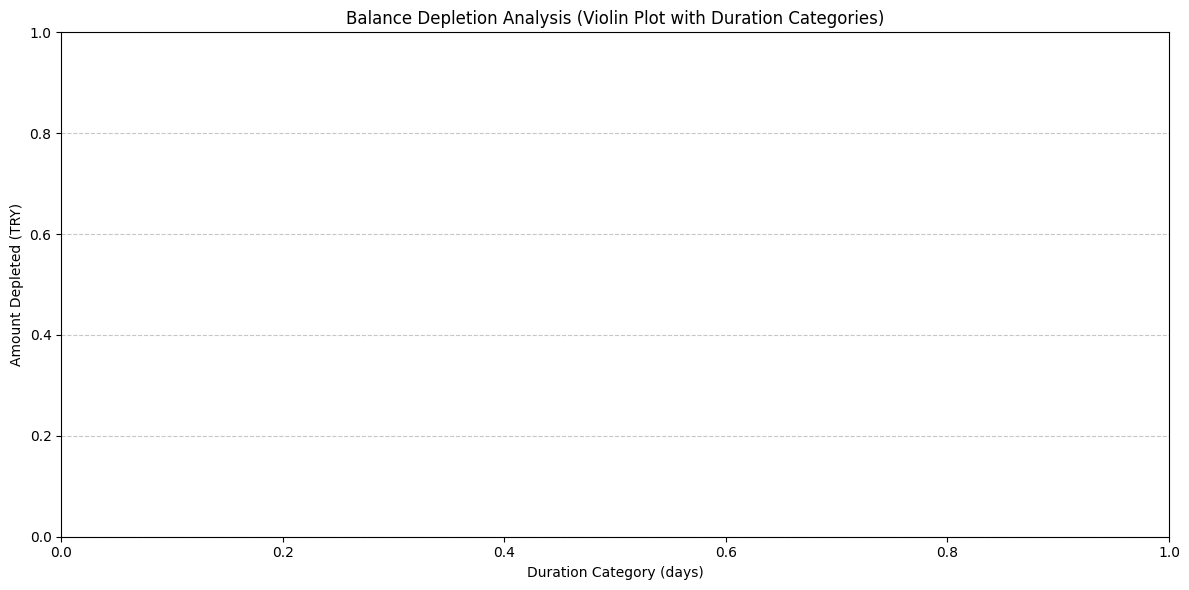

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleme
data = pd.read_csv('/Users/emre/DSA PROJECT/Emre_YONTUCU_ticket.csv')

# Tarih sütununu datetime formatına çevirme
data['IslemZamanı'] = pd.to_datetime(data['IslemZamanı'], errors='coerce')

# Kart bakiyesi sütununu sayısal formata çevirme
data['KartBakiyesi'] = data['KartBakiyesi'].str.replace(',', '.').astype(float)

# Top-up işlemlerini tespit etme
data['is_top_up'] = data['IslemTipi'] != 'Harcama'

# Top-up işlemleri ve tükenme süresi hesaplama
top_up_indices = data.index[data['is_top_up']].tolist()
depletion_durations = []

for i in range(len(top_up_indices) - 1):
    start_index = top_up_indices[i]
    end_index = top_up_indices[i + 1]
    start_balance = data.loc[start_index, 'KartBakiyesi']
    end_balance = data.loc[end_index - 1, 'KartBakiyesi']  # Yüklemeden önceki son bakiye
    duration = (data.loc[end_index - 1, 'IslemZamanı'] - data.loc[start_index, 'IslemZamanı']).days
    depletion_durations.append((start_balance - end_balance, duration))

# Tükenme analizi için DataFrame oluşturma
depletion_df = pd.DataFrame(depletion_durations, columns=['Amount Depleted', 'Duration (days)'])

# Duration (days) değerlerini kategorilere ayırma
bins = [0, 7, 14, 21, 30, 60, 90]  # Gruplama aralıkları
labels = ['0-7', '8-14', '15-21', '22-30', '31-60', '61+']
depletion_df['Duration Category'] = pd.cut(depletion_df['Duration (days)'], bins=bins, labels=labels, right=False)

# Violin plot ile görselleştirme
plt.figure(figsize=(12, 6))
sns.violinplot(data=depletion_df, x='Duration Category', y='Amount Depleted', inner='quartile', palette='muted')
plt.title('Balance Depletion Analysis (Violin Plot with Duration Categories)')
plt.xlabel('Duration Category (days)')
plt.ylabel('Amount Depleted (TRY)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
